# ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

### Load Train data

In [3]:
train_data =pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
train_data.head()

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0  192027691                               12.235703   
1  195542235                               17.270555   
2  196639184                               14.254504   
3  195728812                               18.680834   
4  195251545                                0.673204   

   WORLDCLIM_BIO12_annual_precipitation  \
0                            374.466675   
1                             90.239998   
2                            902.071411   
3                           1473.933350   
4                            530.088867   

   WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                          62.524445                       
1                                          10.351111                       
2                                          49.642857                       
3                                         163.100006                       
4                                          50.857777                       

   WORLDCLIM_BIO15_precipitation_seasonality  \
0                                  72.256844   
1                                  38.220940   
2                                  17.873655   
3                                  45.009758   
4                                  38.230709   

   WORLDCLIM_BIO4_temperature_seasonality  \
0                              773.592041   
1                              859.193298   
2                              387.977753   
3                              381.053986   
4                             1323.526855   

   WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                33.277779                            125   
1                                40.009777                            124   
2                                22.807142                            107   
3                                20.436666                            120   
4                                45.891998                             91   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  ...  \
0                                149                              136  ...   
1                                144                              138  ...   
2                                133                              119  ...   
3                                131                              125  ...   
4                                146                              120  ...   

   X18_mean   X26_mean  X50_mean   X3112_mean     X4_sd    X11_sd    X18_sd  \
0  0.117484   1.243779  1.849375    50.216034  0.008921  1.601473  0.025441   
1  0.389315   0.642940  1.353468   574.098472  0.003102  0.258078  0.000866   
2  8.552908   0.395241  2.343153  1130.096731       NaN       NaN       NaN   
3  1.083629   0.154200  1.155308  1042.686546  0.011692  2.818356  0.110673   
4  0.657585  10.919966  2.246226  2386.467180  0.006157  1.128000  0.026996   

     X26_sd    X50_sd    X3112_sd  
0  0.153608  0.279610   15.045054  
1  0.034630  0.010165   11.004477  
2       NaN       NaN         NaN  
3  0.011334  0.229224  141.857187  
4  0.553815  0.107092   87.146899  

[5 rows x 176 columns]

In [5]:
train_data.shape

(55489, 176)

### Load test data

In [6]:
test_data.head()

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0  195066138                               10.558100   
1  195524180                                7.002870   
2  172220512                               25.973894   
3  195824490                               15.809059   
4  191793047                                3.169444   

   WORLDCLIM_BIO12_annual_precipitation  \
0                            961.500000   
1                           1120.025513   
2                           2754.739746   
3                            502.495544   
4                           1391.533325   

   WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                          31.586735                       
1                                          23.000000                       
2                                         345.306122                       
3                                          57.750000                       
4                                          59.266666                       

   WORLDCLIM_BIO15_precipitation_seasonality  \
0                                  13.728325   
1                                   7.258863   
2                                  49.120426   
3                                  48.954502   
4                                  16.992165   

   WORLDCLIM_BIO4_temperature_seasonality  \
0                              648.038208   
1                              973.889404   
2                               51.744625   
3                              360.168976   
4                              731.082581   

   WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                25.351532                            127   
1                                39.135712                            106   
2                                10.222959                            105   
3                                18.779911                            108   
4                                29.049999                             97   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  ...  \
0                                152                              137  ...   
1                                167                              127  ...   
2                                128                              115  ...   
3                                137                              125  ...   
4                                135                              105  ...   

   VOD_X_1997_2018_multiyear_mean_m03  VOD_X_1997_2018_multiyear_mean_m04  \
0                            0.440003                            0.469694   
1                            0.434866                            0.428838   
2                            0.250050                            0.249430   
3                            0.205763                            0.201707   
4                            0.388394                            0.404746   

   VOD_X_1997_2018_multiyear_mean_m05  VOD_X_1997_2018_multiyear_mean_m06  \
0                            0.455849                            0.528211   
1                            0.456266                            0.470074   
2                            0.250812                            0.249902   
3                            0.207424                            0.212513   
4                            0.440338                            0.457449   

   VOD_X_1997_2018_multiyear_mean_m07  VOD_X_1997_2018_multiyear_mean_m08  \
0                            0.555653                            0.549882   
1                            0.468038                            0.475943   
2                            0.249023                            0.249808   
3                            0.224498                            0.244314   
4                            0.463000                            0.462205   

   VOD_X_1997_2018_multiyear_mean_m09  VOD_X_1997_2018_multiyear_mean_m10  \

In [7]:
test_data.shape

(13873, 164)

### Meta data decribing target variables

In [8]:
target_name = pd.read_csv("../data/target_name_meta.tsv", delimiter='\t')

In [9]:
target_name

trait_ID                                        trait_name 
0       X4  Stem specific density (SSD) or wood density (s...
1      X11  Leaf area per leaf dry mass (specific leaf are...
2      X18                                      Plant height 
3      X26                                     Seed dry mass 
4      X50           Leaf nitrogen (N) content per leaf area 
5    X3112  Leaf area (in case of compound leaves: leaf, u...

In [10]:
train_data.isnull().sum()

id                                                                           0
WORLDCLIM_BIO1_annual_mean_temperature                                       0
WORLDCLIM_BIO12_annual_precipitation                                         0
WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month        0
WORLDCLIM_BIO15_precipitation_seasonality                                    0
                                                                         ...  
X11_sd                                                                   16341
X18_sd                                                                   16341
X26_sd                                                                   16341
X50_sd                                                                   16341
X3112_sd                                                                 16341
Length: 176, dtype: int64

Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

## Dropping Columns having too many null values 

In [11]:
train_data.drop(['X4_sd', 'X11_sd', 'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'], axis = 1, inplace = True)

In [12]:
train_data.shape

(55489, 170)

## Display Images and labels

In [13]:
#Adding a new column specifying image path for corresponding ID: 
train_data['image_path'] = f'../data/train_images/'+train_data['id'].astype(str)+'.jpeg'
target_name = pd.read_csv("../data/target_name_meta.tsv", delimiter='\t')

In [14]:
import matplotlib.image as mpimg

def display_sample_images(df, image_folder_path, sample_size=5):

    sample_size = min(sample_size, len(df))
    sample_df = df.sample(n=sample_size)
    
    fig, axes = plt.subplots(1, sample_size, figsize=(sample_size * 5, 5))
    
    for ax, (_, row) in zip(axes, sample_df.iterrows()):
        image_id = str(int(row['id']))
        image_path = os.path.join(image_folder_path, f"{image_id}.jpeg")
        
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"ID: {image_id}")
    
    plt.tight_layout()
    plt.show()
    
image_folder_path = '../data/train_images'

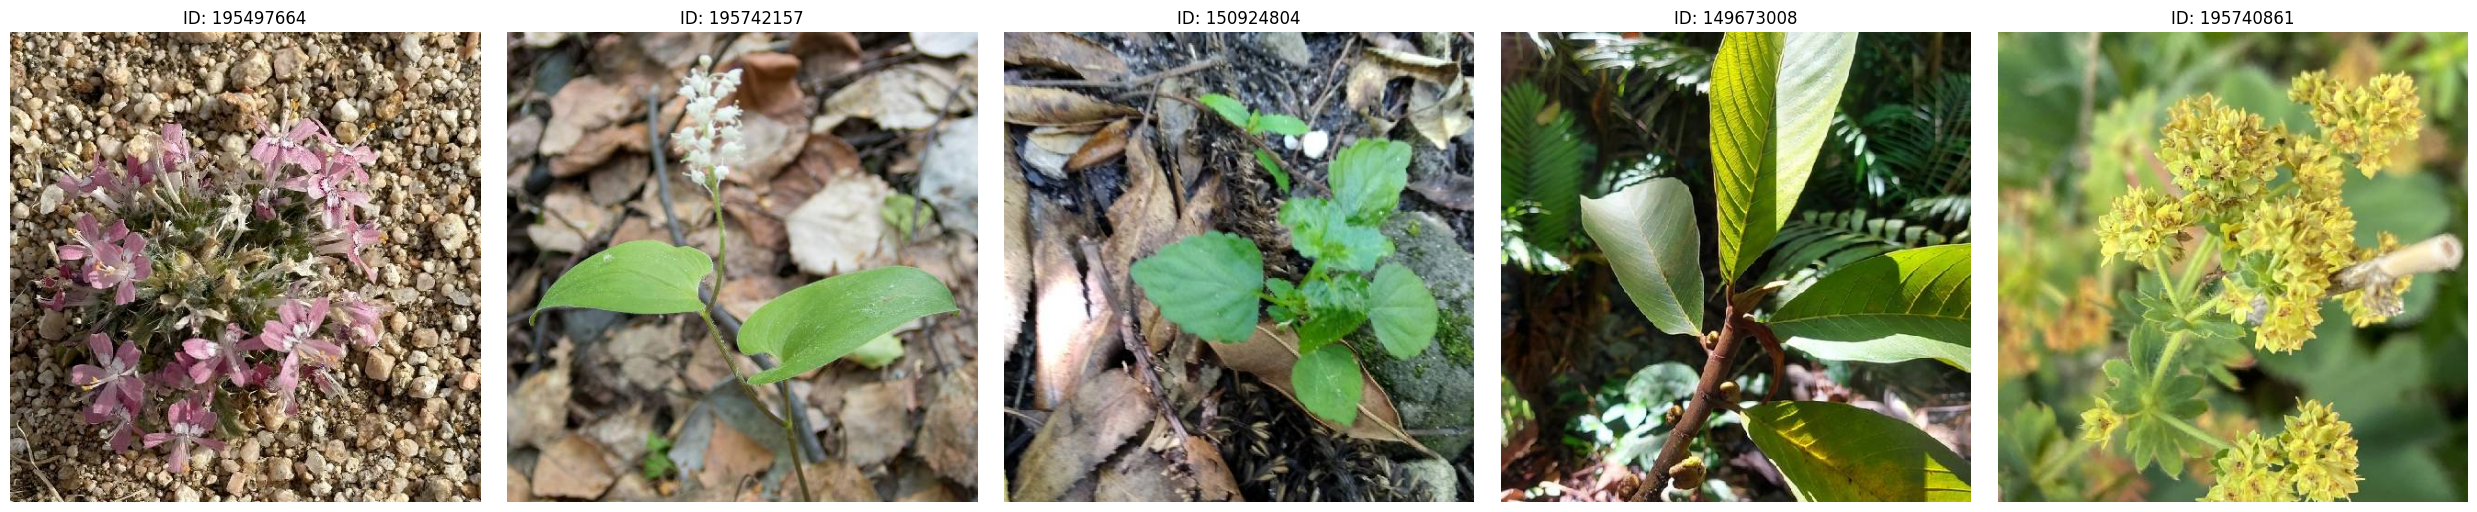

In [15]:
# Display a sample of 5 images
random.seed(7)
display_sample_images(train_data, image_folder_path, sample_size=5)

# 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

In [16]:
### YOUR CODE HERE

## Size of each image

In [18]:
for i in range(0, 50):
    img = train_data['image_path'][i]
    im = Image.open(img)
    width, height = im.size
    print("Width & Height of Image", i+1, ": (", width, "), (", height, ")")

Width & Height of Image 1 : ( 512 ), ( 512 )
Width & Height of Image 2 : ( 512 ), ( 512 )
Width & Height of Image 3 : ( 512 ), ( 512 )
Width & Height of Image 4 : ( 512 ), ( 512 )
Width & Height of Image 5 : ( 512 ), ( 512 )
Width & Height of Image 6 : ( 512 ), ( 512 )
Width & Height of Image 7 : ( 512 ), ( 512 )
Width & Height of Image 8 : ( 512 ), ( 512 )
Width & Height of Image 9 : ( 512 ), ( 512 )
Width & Height of Image 10 : ( 512 ), ( 512 )
Width & Height of Image 11 : ( 512 ), ( 512 )
Width & Height of Image 12 : ( 512 ), ( 512 )
Width & Height of Image 13 : ( 512 ), ( 512 )
Width & Height of Image 14 : ( 512 ), ( 512 )
Width & Height of Image 15 : ( 512 ), ( 512 )
Width & Height of Image 16 : ( 512 ), ( 512 )
Width & Height of Image 17 : ( 512 ), ( 512 )
Width & Height of Image 18 : ( 512 ), ( 512 )
Width & Height of Image 19 : ( 512 ), ( 512 )
Width & Height of Image 20 : ( 512 ), ( 512 )
Width & Height of Image 21 : ( 512 ), ( 512 )
Width & Height of Image 22 : ( 512 ), ( 512

## Display summary statistics for each column

In [19]:
train_data.describe()

id  WORLDCLIM_BIO1_annual_mean_temperature  \
count  5.548900e+04                            55489.000000   
mean   1.714553e+08                               14.577142   
std    4.087868e+07                                7.584290   
min    2.637500e+04                              -13.731130   
25%    1.658614e+08                                9.247916   
50%    1.915103e+08                               15.536692   
75%    1.951001e+08                               20.238457   
max    1.967668e+08                               30.294445   

       WORLDCLIM_BIO12_annual_precipitation  \
count                          55489.000000   
mean                            1058.710939   
std                              768.992166   
min                                0.000000   
25%                              528.315552   
50%                              853.776184   
75%                             1352.000000   
max                             8392.463867   

       WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
count                                       55489.000000                       
mean                                          138.164359                       
std                                           136.409312                       
min                                             0.000000                       
25%                                            53.000000                       
50%                                            95.500000                       
75%                                           181.485718                       
max                                          2448.964355                       

       WORLDCLIM_BIO15_precipitation_seasonality  \
count                               55489.000000   
mean                                   56.727213   
std                                    31.692061   
min                                     0.000000   
25%                                    29.685472   
50%                                    50.196312   
75%                                    80.811249   
max                                   169.582291   

       WORLDCLIM_BIO4_temperature_seasonality  \
count                            55489.000000   
mean                               518.711405   
std                                316.618440   
min                                  9.877081   
25%                                300.478760   
50%                                446.522308   
75%                                690.003845   
max                               2025.894653   

       WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
count                             55489.000000                   55489.000000   
mean                                 25.227185                     116.895673   
std                                   9.151237                      17.607857   
min                                   7.658674                      29.000000   
25%                                  18.800001                     106.000000   
50%                                  23.681778                     118.000000   
75%                                  30.399998                     130.000000   
max                                  63.657616                     194.000000   

       SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  \
count                       55489.000000                     55489.000000   
mean                          140.259205                       128.187695   
std                            15.075214                        16.030602   
min                            46.000000                        42.000000   
25%                           131.000000                       118.000000   
50%                           142.000000                       129.000000   
75%                           150.000000                       139.000000   
max                           192.000000       

## Grouping Columns into 4 types : WORLD CLIMATE, SOIL, MODIS, VOD

In [20]:
# List of column names
columns = list(train_data.columns)
grouped_columns = {}

# Iterate through each column name
for column in columns:
    # Split column name by underscore or other relevant delimiter to extract the prefix
    # Assuming the prefix is the first part before the first underscore
    prefix = column.split('_')[0]
    
    # Check if the prefix includes numbers and set a custom prefix for those cases
    if prefix.isdigit():
        prefix = 'CUSTOM_VARIABLES'
    
    # Add the column name to the corresponding list in the dictionary
    if prefix not in grouped_columns:
        grouped_columns[prefix] = [column]
    else:
        grouped_columns[prefix].append(column)

# grouped_columns now holds your columns grouped by their prefix
grouped_columns

{'id': ['id'],
 'WORLDCLIM': ['WORLDCLIM_BIO1_annual_mean_temperature',
  'WORLDCLIM_BIO12_annual_precipitation',
  'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
  'WORLDCLIM_BIO15_precipitation_seasonality',
  'WORLDCLIM_BIO4_temperature_seasonality',
  'WORLDCLIM_BIO7_temperature_annual_range'],
 'SOIL': ['SOIL_bdod_0.5cm_mean_0.01_deg',
  'SOIL_bdod_100.200cm_mean_0.01_deg',
  'SOIL_bdod_15.30cm_mean_0.01_deg',
  'SOIL_bdod_30.60cm_mean_0.01_deg',
  'SOIL_bdod_5.15cm_mean_0.01_deg',
  'SOIL_bdod_60.100cm_mean_0.01_deg',
  'SOIL_cec_0.5cm_mean_0.01_deg',
  'SOIL_cec_100.200cm_mean_0.01_deg',
  'SOIL_cec_15.30cm_mean_0.01_deg',
  'SOIL_cec_30.60cm_mean_0.01_deg',
  'SOIL_cec_5.15cm_mean_0.01_deg',
  'SOIL_cec_60.100cm_mean_0.01_deg',
  'SOIL_cfvo_0.5cm_mean_0.01_deg',
  'SOIL_cfvo_100.200cm_mean_0.01_deg',
  'SOIL_cfvo_15.30cm_mean_0.01_deg',
  'SOIL_cfvo_30.60cm_mean_0.01_deg',
  'SOIL_cfvo_5.15cm_mean_0.01_deg',
  'SOIL_cfvo_60.100cm_mean_0.01_deg',
  'SOI

## Data frame for variables of WORLD CLIMATE

In [21]:
df1= train_data[['id']+grouped_columns['WORLDCLIM']].copy()

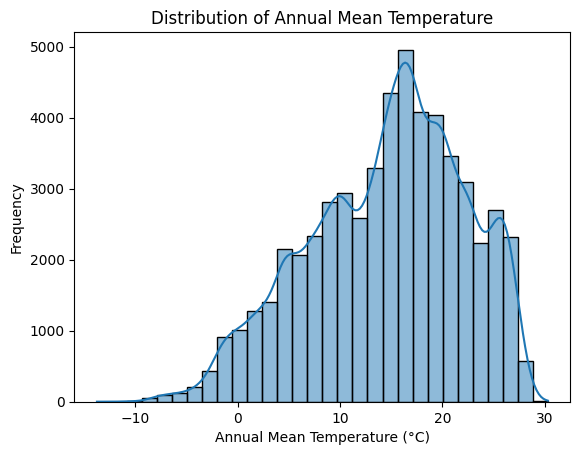

In [22]:
sns.histplot(data=df1, x='WORLDCLIM_BIO1_annual_mean_temperature', bins=30, kde=True)
plt.title('Distribution of Annual Mean Temperature')
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

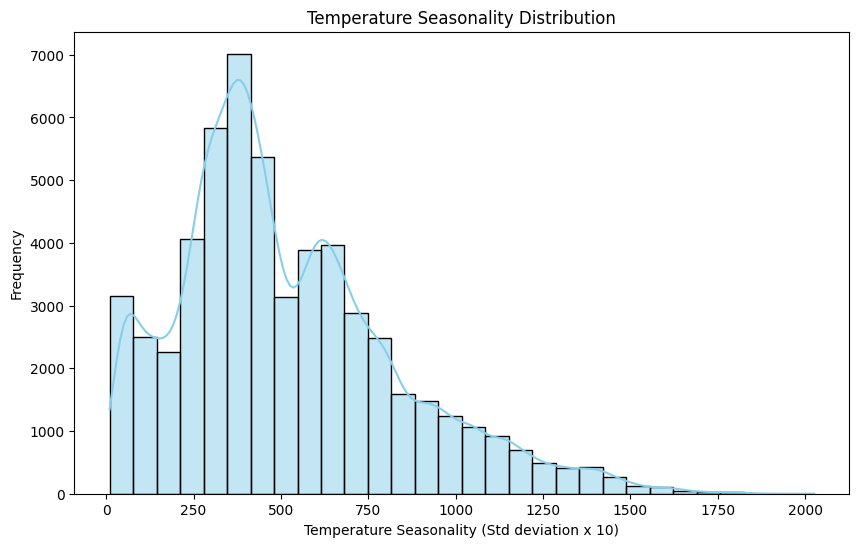

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['WORLDCLIM_BIO4_temperature_seasonality'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Seasonality Distribution')
plt.xlabel('Temperature Seasonality (Std deviation x 10)')
plt.ylabel('Frequency')
plt.show()

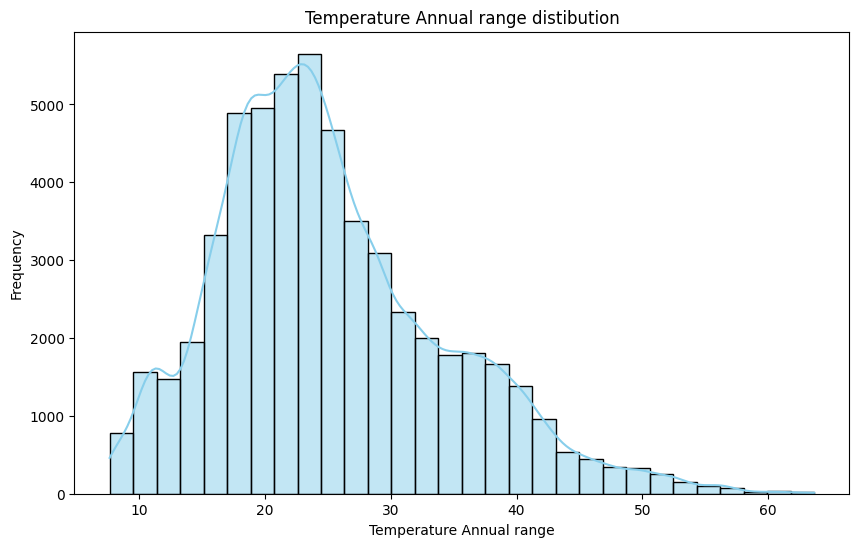

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['WORLDCLIM_BIO7_temperature_annual_range'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Annual range distibution')
plt.xlabel('Temperature Annual range')
plt.ylabel('Frequency')
plt.show()

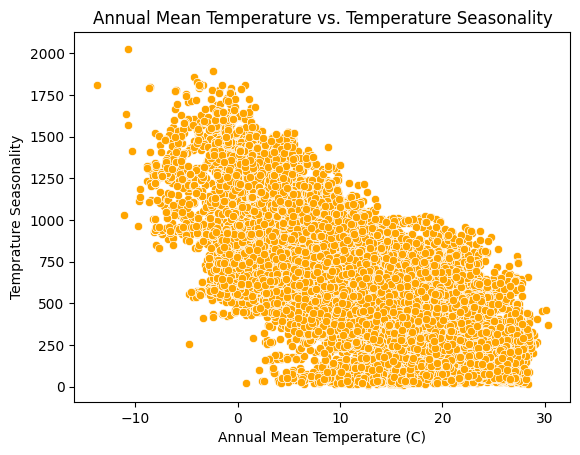

In [25]:
sns.scatterplot(data=df1, x='WORLDCLIM_BIO1_annual_mean_temperature', y='WORLDCLIM_BIO4_temperature_seasonality', color = 'orange')
plt.title('Annual Mean Temperature vs. Temperature Seasonality')
plt.xlabel('Annual Mean Temperature (C)')
plt.ylabel('Temprature Seasonality')
plt.show()

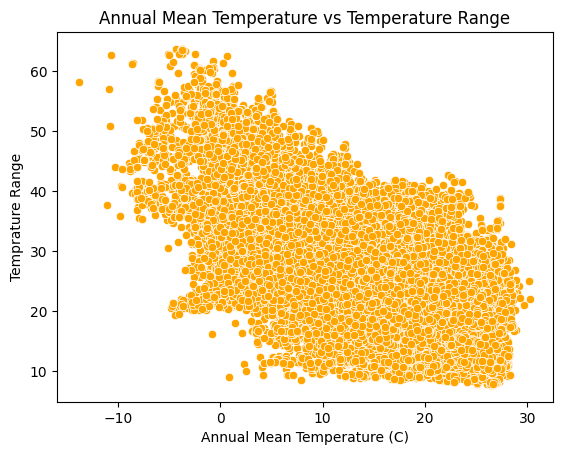

In [26]:
sns.scatterplot(data=df1, x='WORLDCLIM_BIO1_annual_mean_temperature', y='WORLDCLIM_BIO7_temperature_annual_range', color = 'orange')
plt.title('Annual Mean Temperature vs Temperature Range')
plt.xlabel('Annual Mean Temperature (C)')
plt.ylabel('Temprature Range')
plt.show()

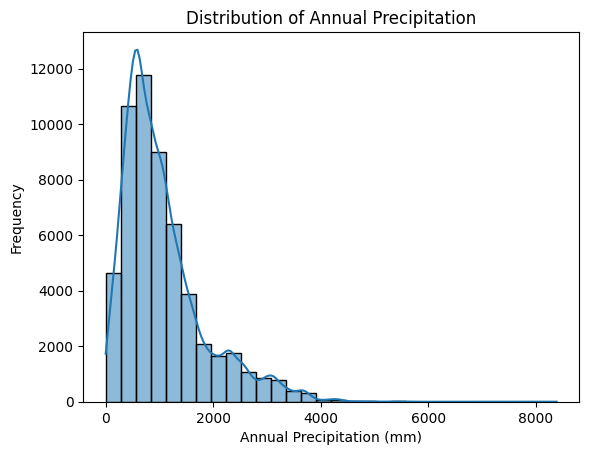

In [27]:
sns.histplot(data=df1, x='WORLDCLIM_BIO12_annual_precipitation', bins=30, kde=True)
plt.title('Distribution of Annual Precipitation')
plt.xlabel('Annual Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

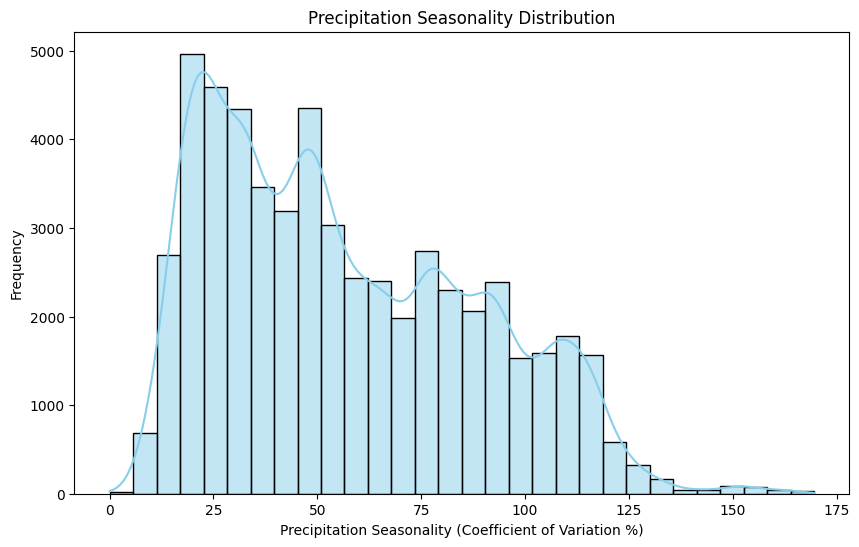

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['WORLDCLIM_BIO15_precipitation_seasonality'], bins=30, kde=True, color='skyblue')
plt.title('Precipitation Seasonality Distribution')
plt.xlabel('Precipitation Seasonality (Coefficient of Variation %)')
plt.ylabel('Frequency')
plt.show()

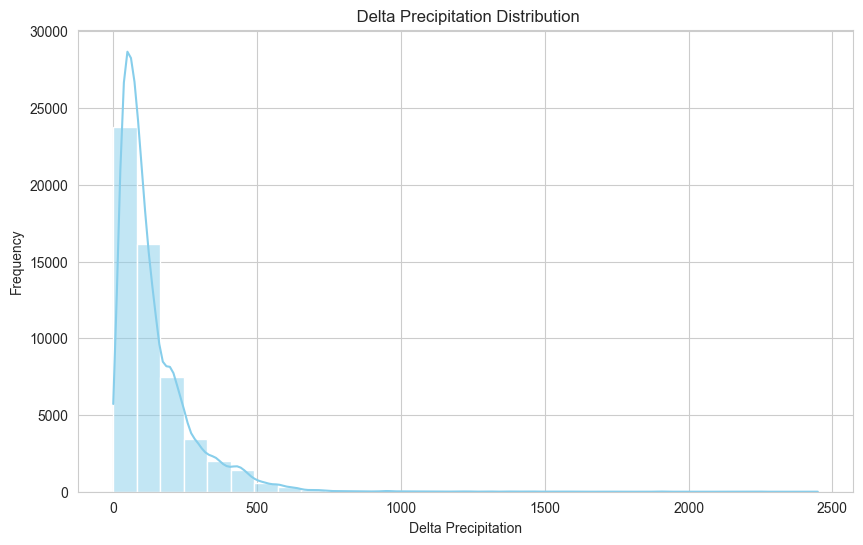

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month'], bins=30, kde=True, color='skyblue')
plt.title(' Delta Precipitation Distribution')
plt.xlabel('Delta Precipitation')
plt.ylabel('Frequency')
plt.show()

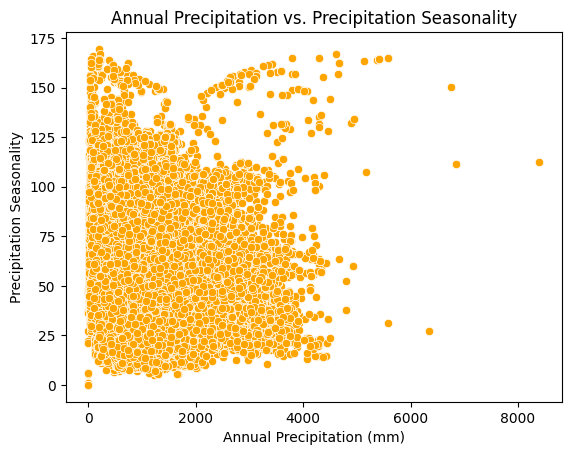

In [30]:
sns.scatterplot(data=df1, x='WORLDCLIM_BIO12_annual_precipitation', y='WORLDCLIM_BIO15_precipitation_seasonality', color = 'orange')
plt.title('Annual Precipitation vs. Precipitation Seasonality')
plt.xlabel('Annual Precipitation (mm)')
plt.ylabel('Precipitation Seasonality')
plt.show()

Text(0.5, 1.0, 'Correlation between climate variables')

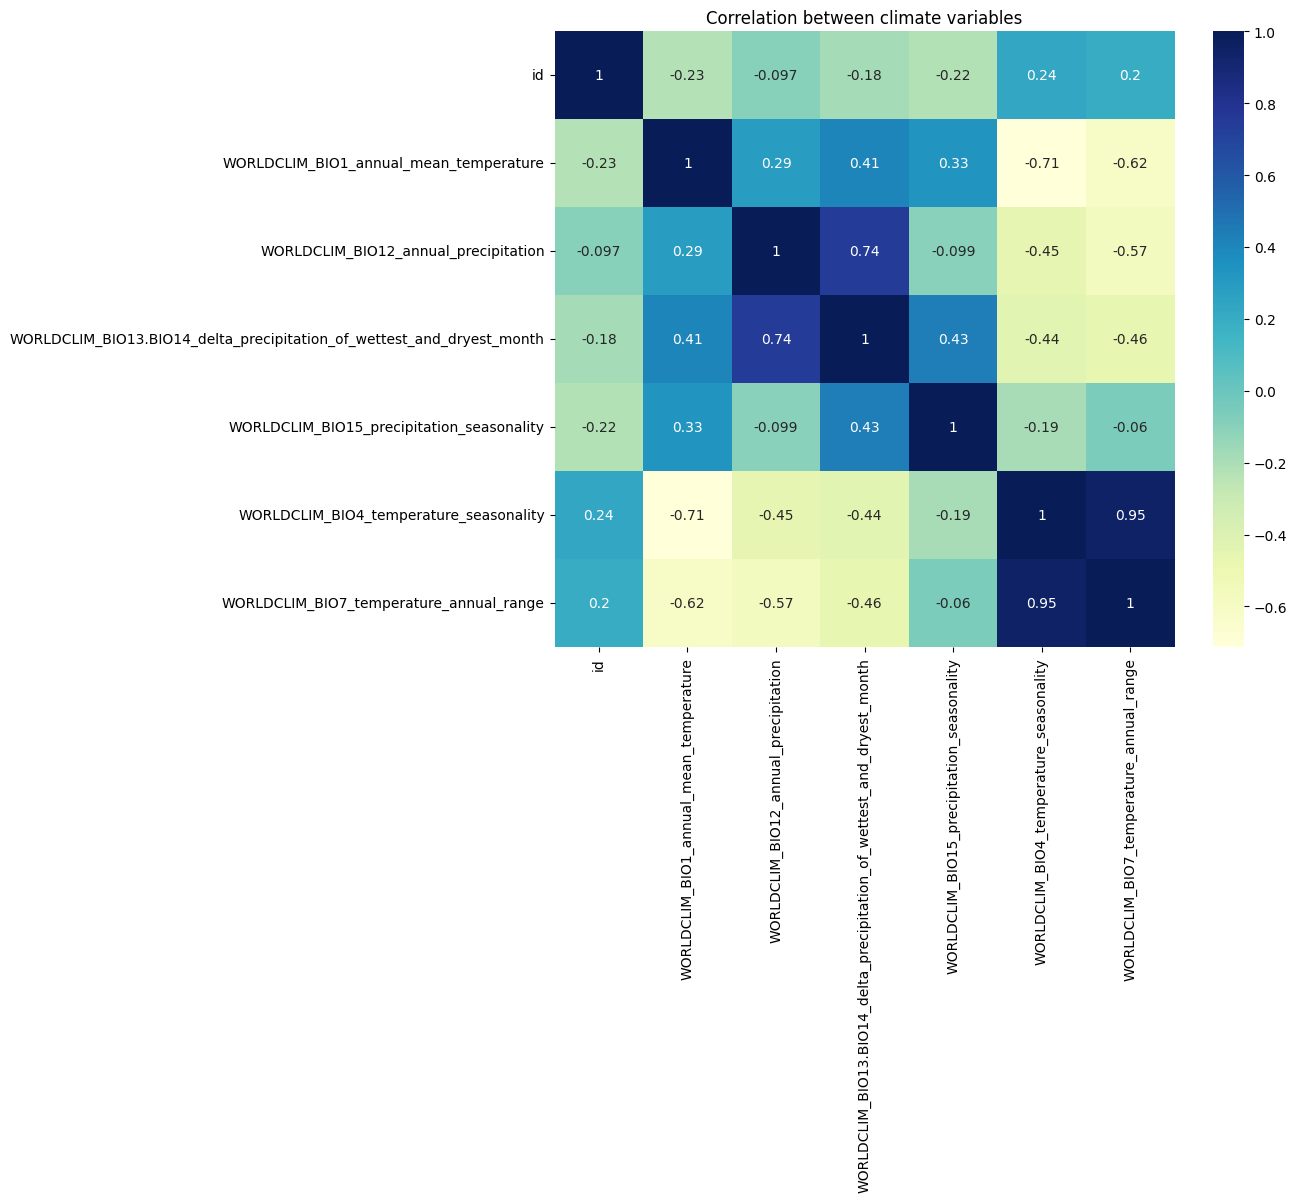

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df1.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation between climate variables')

## Data Frame for variables of SOIL 

In [32]:
df2= train_data[['id']+grouped_columns['SOIL']].copy()
df2.head()

id  SOIL_bdod_0.5cm_mean_0.01_deg  \
0  192027691                            125   
1  195542235                            124   
2  196639184                            107   
3  195728812                            120   
4  195251545                             91   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  \
0                                149                              136   
1                                144                              138   
2                                133                              119   
3                                131                              125   
4                                146                              120   

   SOIL_bdod_30.60cm_mean_0.01_deg  SOIL_bdod_5.15cm_mean_0.01_deg  \
0                              145                             132   
1                              143                             128   
2                              126                             114   
3                              131                             123   
4                              138                             109   

   SOIL_bdod_60.100cm_mean_0.01_deg  SOIL_cec_0.5cm_mean_0.01_deg  \
0                               148                           228   
1                               142                           145   
2                               132                           283   
3                               131                           234   
4                               143                           381   

   SOIL_cec_100.200cm_mean_0.01_deg  SOIL_cec_15.30cm_mean_0.01_deg  ...  \
0                               210                             221  ...   
1                               139                             149  ...   
2                               254                             252  ...   
3                               220                             223  ...   
4                               325                             352  ...   

   SOIL_silt_15.30cm_mean_0.01_deg  SOIL_silt_30.60cm_mean_0.01_deg  \
0                              373                              359   
1                              317                              303   
2                              304                              291   
3                              315                              293   
4                              376                              377   

   SOIL_silt_5.15cm_mean_0.01_deg  SOIL_silt_60.100cm_mean_0.01_deg  \
0                             367                               353   
1                             310                               292   
2                             306                               278   
3                             312                               308   
4                             367                               353   

   SOIL_soc_0.5cm_mean_0.01_deg  SOIL_soc_100.200cm_mean_0.01_deg  \
0                           312                                49   
1                            52                                49   
2                           783                               288   
3                           473                                62   
4                           737                               178   

   SOIL_soc_15.30cm_mean_0.01_deg  SOIL_soc_30.60cm_mean_0.01_deg  \
0                             126                              94   
1                              33                              22   
2                             412                             309   
3                             224                              97   
4                             331                             214   

   SOIL_soc_5.15cm_mean_0.01_deg  SOIL_soc_60.100cm_mean_0.01_deg  
0                            208                               38  
1                             50                               20  
2                            504                              255  
3                            344       

In [33]:
# Different categories in SOIL column
columns = list(df2.columns[1:])
categories = {
    'bdod': [],
    'cec': [],
    'cfvo': [],
    'clay': [],
    'nitrogen': [],
    'ocd': [],
    'ocs': [],
    'phh2o': [],
    'sand': [],
    'silt': [],
    'soc': []
}

for col in columns:
    prefix = col.split('_')[1]
    categories[prefix].append(col)


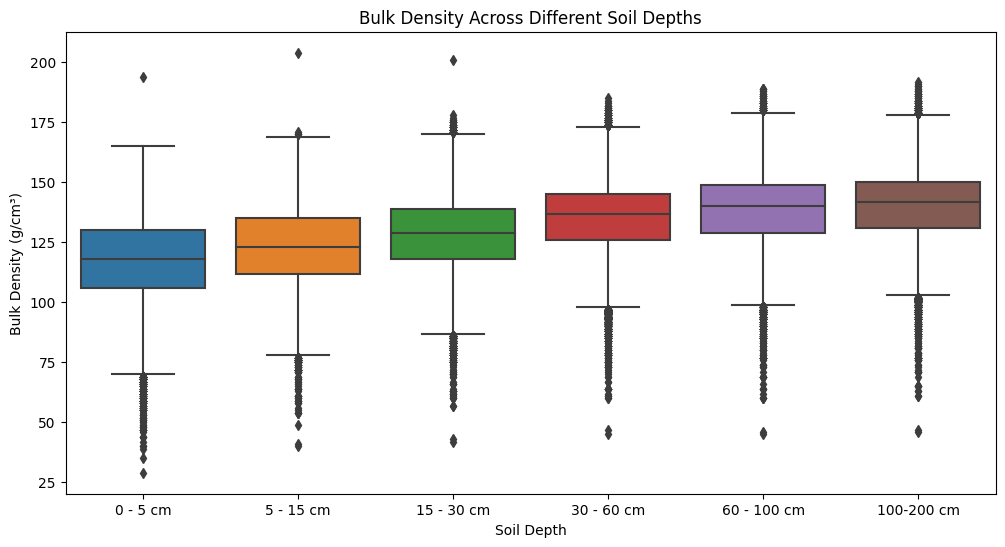

In [34]:
bdod_cols = [col for col in df2.columns if 'SOIL_bdod' in col]
df_bdod = df2[bdod_cols].iloc[:,[0,4,2,3,5,1]]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_bdod)
plt.title('Bulk Density Across Different Soil Depths')
plt.ylabel('Bulk Density (g/cm³)')
plt.xlabel('Soil Depth')
labels = ['0 - 5 cm' ,  '5 - 15 cm', '15 - 30 cm' , '30 - 60 cm' ,  '60 - 100 cm', '100-200 cm',]
plt.xticks(np.arange(len(labels)), labels)
plt.show()

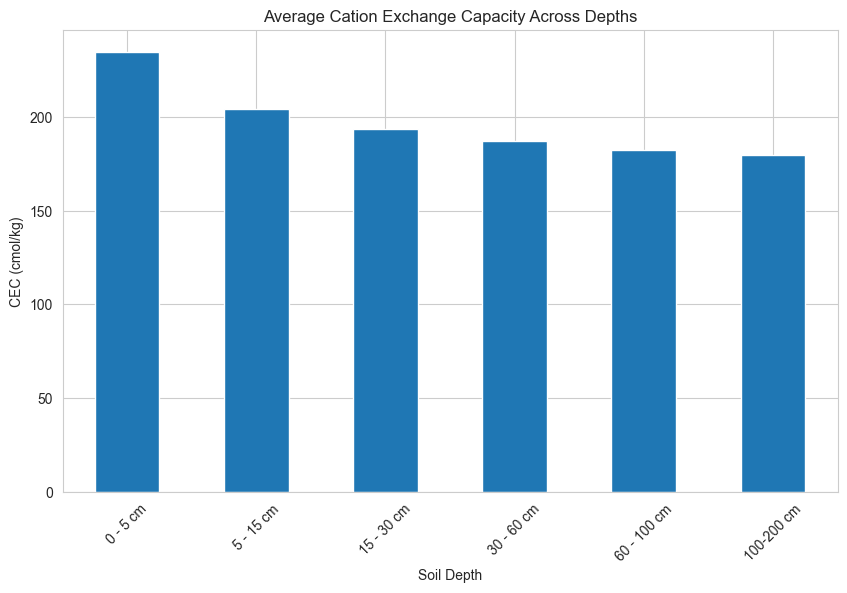

In [76]:
cec_columns = categories['cec']
df2[cec_columns].iloc[:,[0,4,2,3,5,1]].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Cation Exchange Capacity Across Depths')
plt.xlabel('Soil Depth')
plt.ylabel('CEC (cmol/kg)')
labels = ['0 - 5 cm' ,  '5 - 15 cm', '15 - 30 cm' , '30 - 60 cm' ,  '60 - 100 cm', '100-200 cm',]
plt.xticks(np.arange(len(labels)), labels,  rotation = 45)
plt.show()

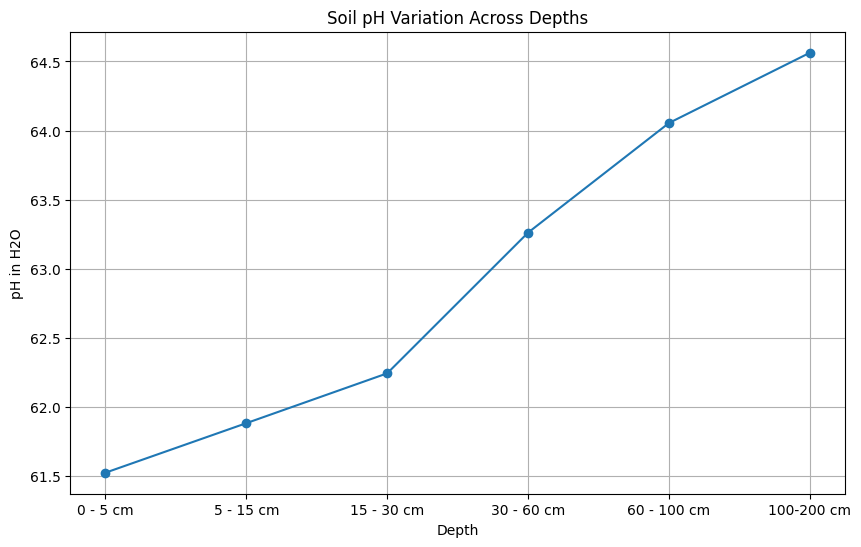

In [36]:
phh2o_columns = categories['phh2o']
df2[phh2o_columns].iloc[:,[0,4,2,3,5,1]].mean().plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Soil pH Variation Across Depths')
plt.xlabel('Depth')
plt.ylabel('pH in H2O')
plt.grid(True)
labels = ['0 - 5 cm' ,  '5 - 15 cm', '15 - 30 cm' , '30 - 60 cm' ,  '60 - 100 cm', '100-200 cm',]
plt.xticks(np.arange(len(labels)), labels)
plt.show()

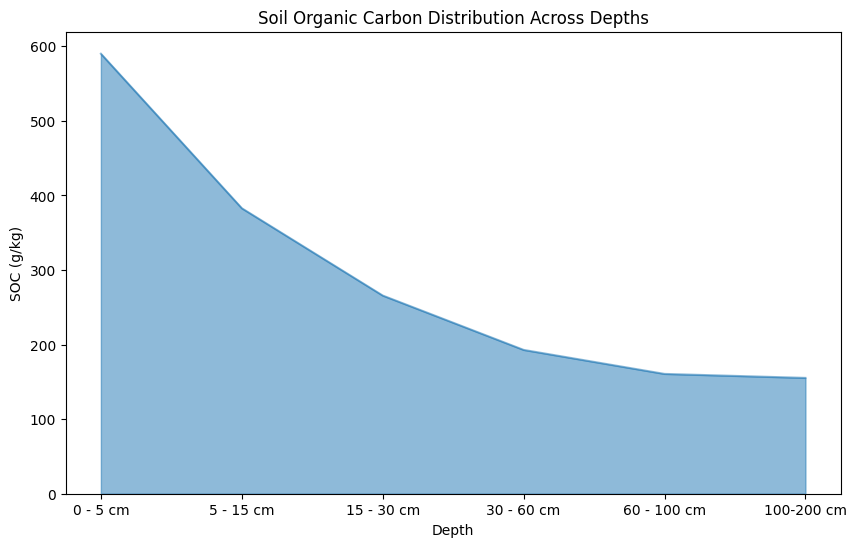

In [37]:
soc_columns = categories['soc']
df2[soc_columns].iloc[:,[0,4,2,3,5,1]].mean().plot(kind='area', figsize=(10, 6), alpha=0.5)
plt.title('Soil Organic Carbon Distribution Across Depths')
plt.xlabel('Depth')
plt.ylabel('SOC (g/kg)')
labels = ['0 - 5 cm' ,  '5 - 15 cm', '15 - 30 cm' , '30 - 60 cm' ,  '60 - 100 cm', '100-200 cm',]
plt.xticks(np.arange(len(labels)), labels)
plt.show()

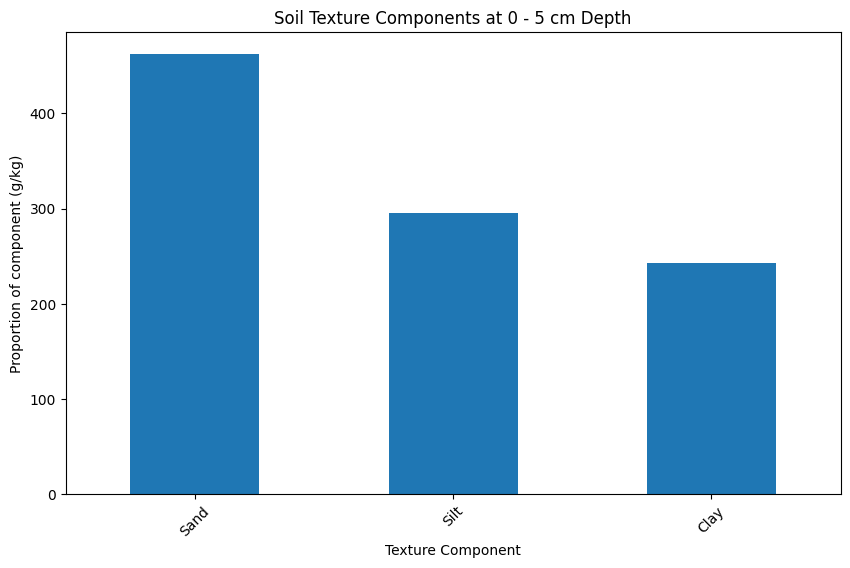

In [38]:
texture_cols = ['SOIL_sand_0.5cm_mean_0.01_deg', 'SOIL_silt_0.5cm_mean_0.01_deg', 'SOIL_clay_0.5cm_mean_0.01_deg']
df_texture = df2[texture_cols]
# Average texture component for visualization
texture_means = df_texture.mean()

plt.figure(figsize=(10, 6))
texture_means.plot(kind='bar')
plt.title('Soil Texture Components at 0 - 5 cm Depth')
plt.ylabel('Proportion of component (g/kg)')
plt.xlabel('Texture Component')
labels = ['Sand' , 'Silt' , 'Clay' ]
plt.xticks(np.arange(len(labels)), labels, rotation = 45)
plt.show()

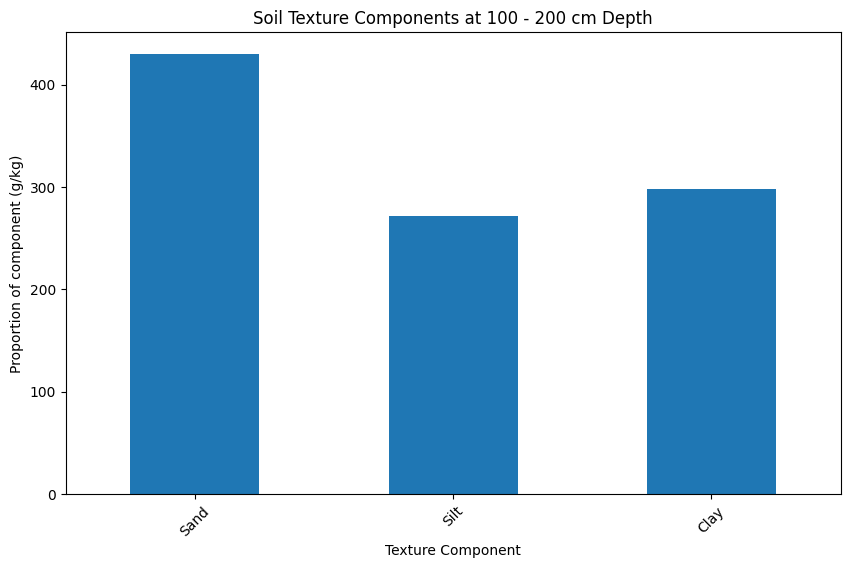

In [39]:
texture_cols_100 = ['SOIL_sand_100.200cm_mean_0.01_deg', 'SOIL_silt_100.200cm_mean_0.01_deg', 'SOIL_clay_100.200cm_mean_0.01_deg']
df_texture100 = df2[texture_cols_100]
# Average texture component for visualization
texture_means = df_texture100.mean()

plt.figure(figsize=(10, 6))
texture_means.plot(kind='bar')
plt.title('Soil Texture Components at 100 - 200 cm Depth')
plt.ylabel('Proportion of component (g/kg)')
plt.xlabel('Texture Component')
labels = ['Sand' , 'Silt' , 'Clay' ]
plt.xticks(np.arange(len(labels)), labels, rotation = 45)
plt.show()

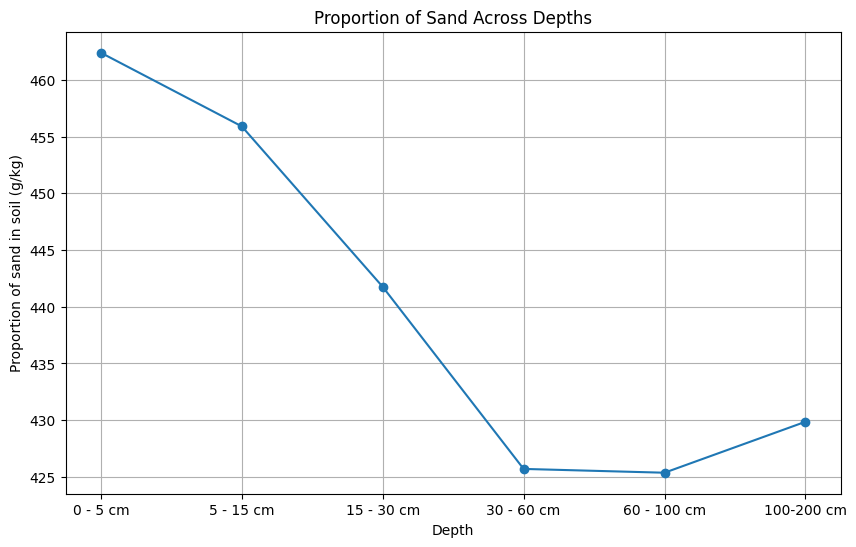

In [40]:
sand_columns = categories['sand']
df2[sand_columns]
df2[sand_columns].iloc[:,[0,4,2,3,5,1]].mean().plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Proportion of Sand Across Depths')
plt.xlabel('Depth')
plt.ylabel('Proportion of sand in soil (g/kg)')
plt.grid(True)
labels = ['0 - 5 cm' ,  '5 - 15 cm', '15 - 30 cm' , '30 - 60 cm' ,  '60 - 100 cm', '100-200 cm',]
plt.xticks(np.arange(len(labels)), labels)
plt.show()

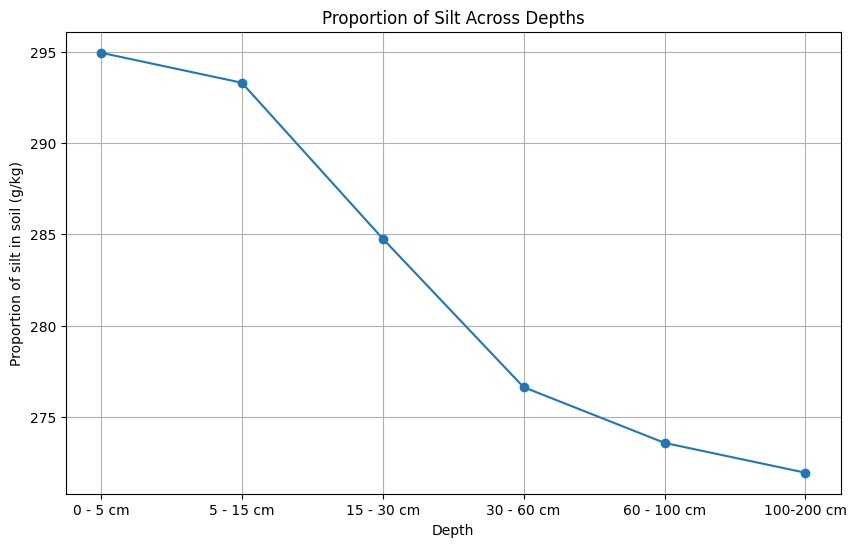

In [41]:
silt_columns = categories['silt']
df2[silt_columns]
df2[silt_columns].iloc[:,[0,4,2,3,5,1]].mean().plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Proportion of Silt Across Depths')
plt.xlabel('Depth')
plt.ylabel('Proportion of silt in soil (g/kg)')
plt.grid(True)
labels = ['0 - 5 cm' ,  '5 - 15 cm', '15 - 30 cm' , '30 - 60 cm' ,  '60 - 100 cm', '100-200 cm',]
plt.xticks(np.arange(len(labels)), labels)
plt.show()

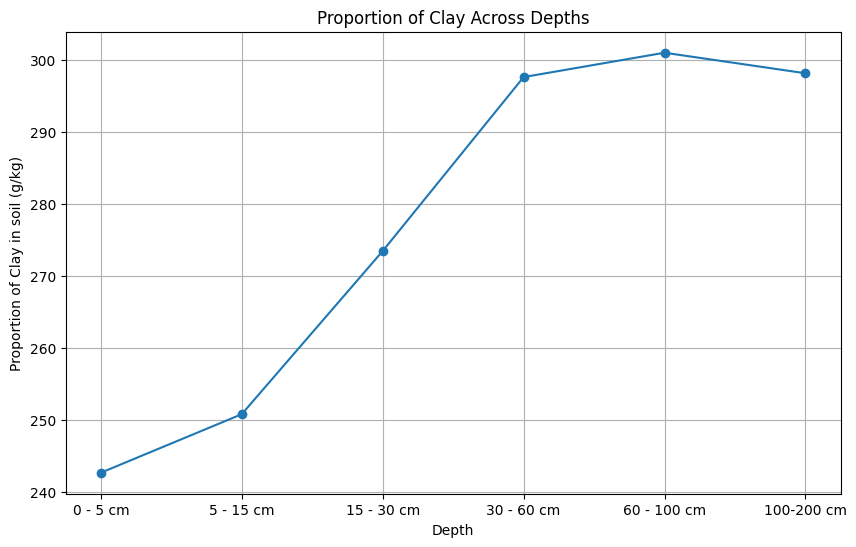

In [42]:
clay_columns = categories['clay']
df2[clay_columns]
df2[clay_columns].iloc[:,[0,4,2,3,5,1]].mean().plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Proportion of Clay Across Depths')
plt.xlabel('Depth')
plt.ylabel('Proportion of Clay in soil (g/kg)')
plt.grid(True)
labels = ['0 - 5 cm' ,  '5 - 15 cm', '15 - 30 cm' , '30 - 60 cm' ,  '60 - 100 cm', '100-200 cm',]
plt.xticks(np.arange(len(labels)), labels)
plt.show()

## Data Frame for variables of MODIS (Satellite data that measures optical reflectance of sun light)

In [43]:
df3= train_data[['id']+grouped_columns['MODIS']].copy()
df3.head()

id  \
0  192027691   
1  195542235   
2  196639184   
3  195728812   
4  195251545   

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1  \
0                                                543                     
1                                                837                     
2                                                953                     
3                                                565                     
4                                               3137                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1  \
0                                                943                     
1                                                920                     
2                                               3236                     
3                                               3225                     
4                                               3253                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1  \
0                                                429                     
1                                                527                     
2                                                519                     
3                                                296                     
4                                               3727                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1  \
0                                                568                     
1                                                710                     
2                                                885                     
3                                                661                     
4                                               3386                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1  \
0                                               1199                     
1                                                977                     
2                                               3682                     
3                                               3379                     
4                                               2286                     

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10  \
0                                                657                      
1                                               1111                      
2                                                501                      
3                                                617                      
4                                                838                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10  \
0                                               1088                      
1                                               1218                      
2                                               4240                      
3                                               2934                      
4                                               1678                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10  \
0                                                438                      
1                                                708                      
2                                                294                      
3                                                321                      
4                                                598                      

   MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10  ...  \
0                                                618                     ...   
1                                                941                     ...   
2                                                736                     ...   
3              

In [44]:
## Creating a dataframe with band, month and reflectance

In [45]:
df_long = pd.DataFrame(columns=['Band', 'Month', 'Reflectance'])

for col in df3.columns:
    if col == 'id':
        continue  
    print(col)
    
    band = col.split('_')[7]  
    month = col.split('_')[-1]  
    
    temp_df = pd.DataFrame({
        'Band': band,
        'Month': int(month.replace('m', '')),  
        'Reflectance': df3[col]
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1
MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10
MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m11
MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11
MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11
MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m11
MODIS_2000.2020_monthly_mean_surface_re

In [46]:
df_long

Band Month Reflectance
0         01     1         543
1         01     1         837
2         01     1         953
3         01     1         565
4         01     1        3137
...      ...   ...         ...
3329335   05     9        3009
3329336   05     9        3292
3329337   05     9        2214
3329338   05     9        2793
3329339   05     9        3322

[3329340 rows x 3 columns]

In [77]:
sns.set_style("whitegrid")
df_long['Month'] = df_long['Month'].astype(int)

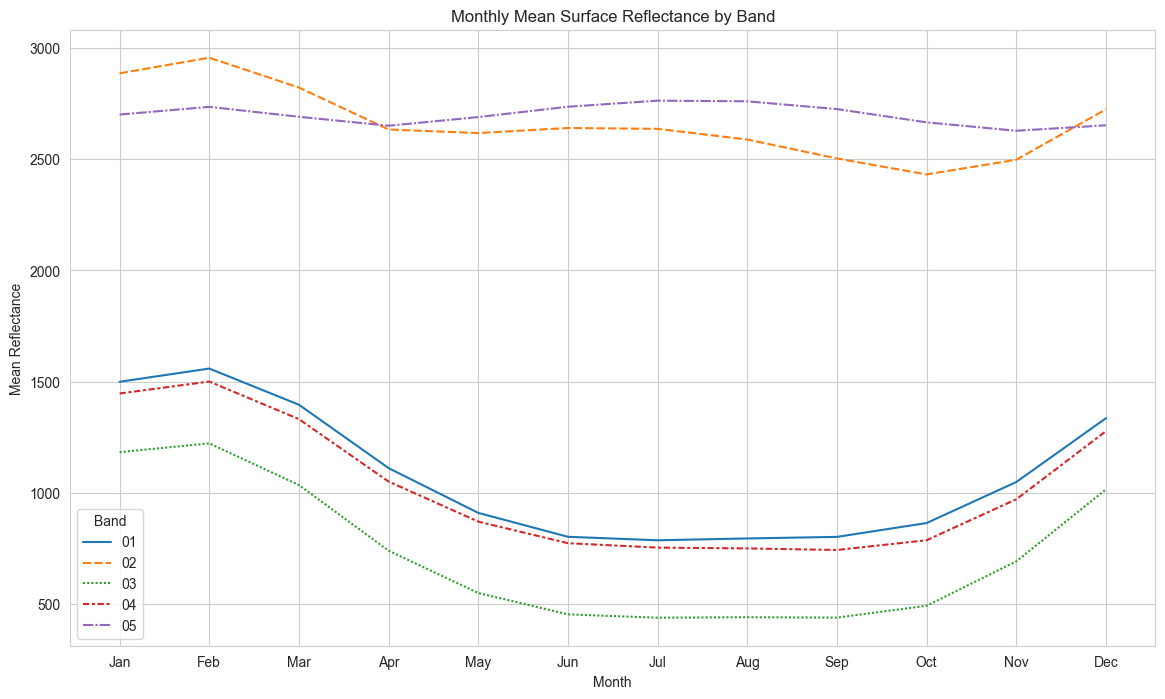

In [80]:
df_long['Month'] = df_long['Month'].astype(int)
df_pivoted = df_long.pivot_table(index='Month', columns='Band', values='Reflectance', aggfunc='mean')

df_pivoted['M'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Dictionary mapping numeric index to month names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map numeric index to month names
df_pivoted.index = df_pivoted.index.map(month_names)

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_pivoted)
plt.title('Monthly Mean Surface Reflectance by Band')
plt.xlabel('Month')
plt.ylabel('Mean Reflectance')
plt.legend(title='Band')
plt.show()

## Data Frame for variables of VOD 

In [49]:
df4= train_data[['id']+grouped_columns['VOD']].copy()
df4.head()

id  VOD_C_2002_2018_multiyear_mean_m01  \
0  192027691                            0.338971   
1  195542235                            0.265089   
2  196639184                            0.441699   
3  195728812                            0.340650   
4  195251545                            0.458608   

   VOD_C_2002_2018_multiyear_mean_m02  VOD_C_2002_2018_multiyear_mean_m03  \
0                            0.348590                            0.390214   
1                            0.248952                            0.228648   
2                            0.428869                            0.425790   
3                            0.331080                            0.343284   
4                            0.309740                            0.354649   

   VOD_C_2002_2018_multiyear_mean_m04  VOD_C_2002_2018_multiyear_mean_m05  \
0                            0.419935                            0.412300   
1                            0.219438                            0.212008   
2                            0.414703                            0.412291   
3                            0.334147                            0.338084   
4                            0.393623                            0.421163   

   VOD_C_2002_2018_multiyear_mean_m06  VOD_C_2002_2018_multiyear_mean_m07  \
0                            0.399303                            0.381950   
1                            0.200188                            0.206500   
2                            0.409913                            0.406059   
3                            0.336621                            0.345327   
4                            0.537507                            0.581277   

   VOD_C_2002_2018_multiyear_mean_m08  VOD_C_2002_2018_multiyear_mean_m09  \
0                            0.373861                            0.377692   
1                            0.204708                            0.206359   
2                            0.413054                            0.424531   
3                            0.338007                            0.334226   
4                            0.574287                            0.521677   

   ...  VOD_X_1997_2018_multiyear_mean_m03  \
0  ...                            0.455806   
1  ...                            0.277699   
2  ...                            0.436853   
3  ...                            0.334322   
4  ...                            0.358661   

   VOD_X_1997_2018_multiyear_mean_m04  VOD_X_1997_2018_multiyear_mean_m05  \
0                            0.506616                            0.531718   
1                            0.270621                            0.264534   
2                            0.439573                            0.446150   
3                            0.328369                            0.316033   
4                            0.419538                            0.466089   

   VOD_X_1997_2018_multiyear_mean_m06  VOD_X_1997_2018_multiyear_mean_m07  \
0                            0.509142                            0.444842   
1                            0.244796                            0.253600   
2                            0.451612                            0.444537   
3                            0.305631                            0.321647   
4                            0.562763                            0.608216   

   VOD_X_1997_2018_multiyear_mean_m08  VOD_X_1997_2018_multiyear_mean_m09  \
0                            0.423471                            0.444432   
1                            0.251986                            0.261273   
2                            0.434794                            0.444734   
3                            0.329818                            0.318389   
4                            0.610752                            0.565290   

   VOD_X_1997_2018_multiyear_mean_m10  VOD_X_1997_2018_multiyear_mean_m11  \
0                            0.472432                            0.448272   
1                        

In [50]:
## Creating a data frame with Freq Band, Month and VOD value

In [51]:
df_melted = df4.melt(id_vars='id', var_name='Measurement', value_name='VOD')

df_melted['Band'] = df_melted['Measurement'].apply(lambda x: x.split('_')[1])
df_melted['Month'] = df_melted['Measurement'].apply(lambda x: x[-3:]).str.replace('m', '').astype(int)
df_melted.drop(columns=['Measurement'], inplace=True)
df_melted

id       VOD Band  Month
0        192027691  0.338971    C      1
1        195542235  0.265089    C      1
2        196639184  0.441699    C      1
3        195728812  0.340650    C      1
4        195251545  0.458608    C      1
...            ...       ...  ...    ...
1997599  190558785  0.292813    X     12
1997600  194523231  0.294559    X     12
1997601  195888987  0.147268    X     12
1997602  135487319  0.341447    X     12
1997603  146608105  0.669636    X     12

[1997604 rows x 4 columns]

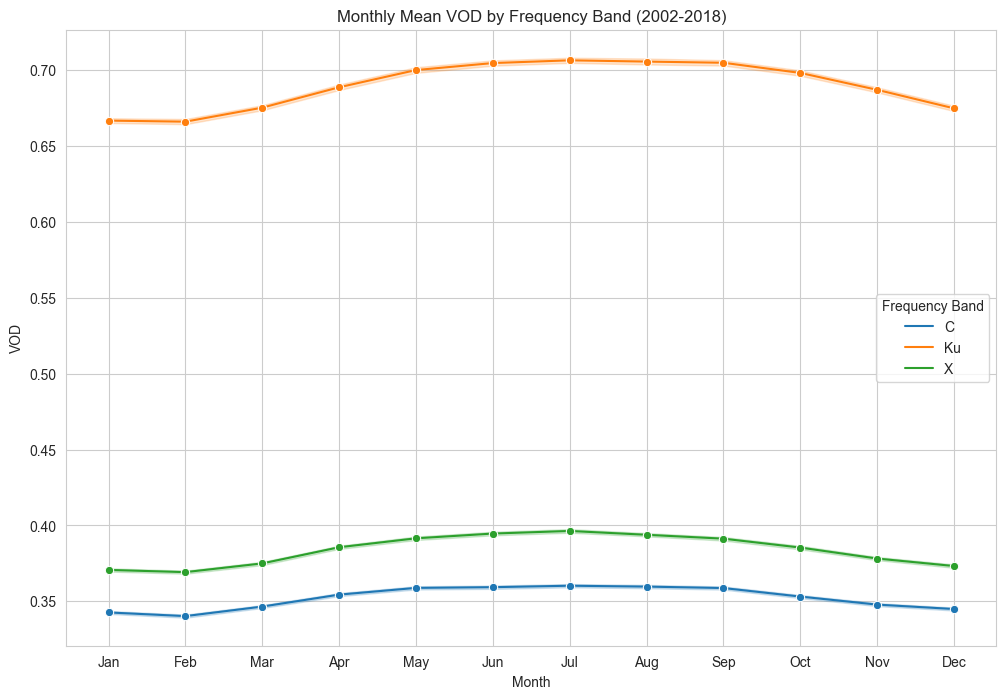

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Month', y='VOD', hue='Band', marker='o')
plt.title('Monthly Mean VOD by Frequency Band (2002-2018)')
plt.xlabel('Month')
plt.ylabel('VOD')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Frequency Band')
plt.show()

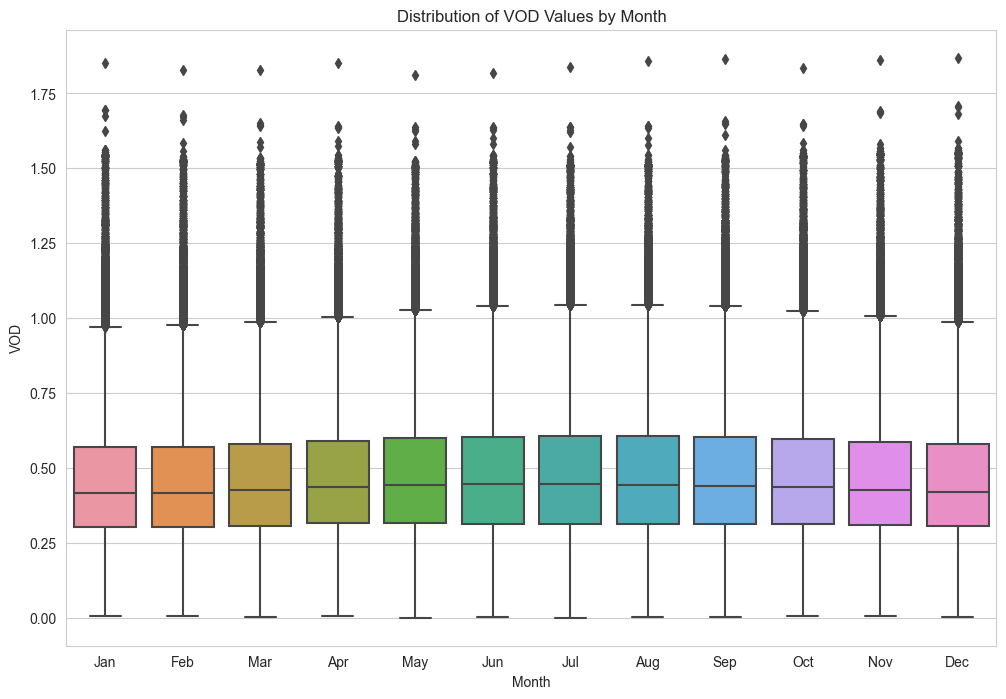

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Month', y='VOD')
plt.title('Distribution of VOD Values by Month')
plt.xlabel('Month')
plt.ylabel('VOD')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

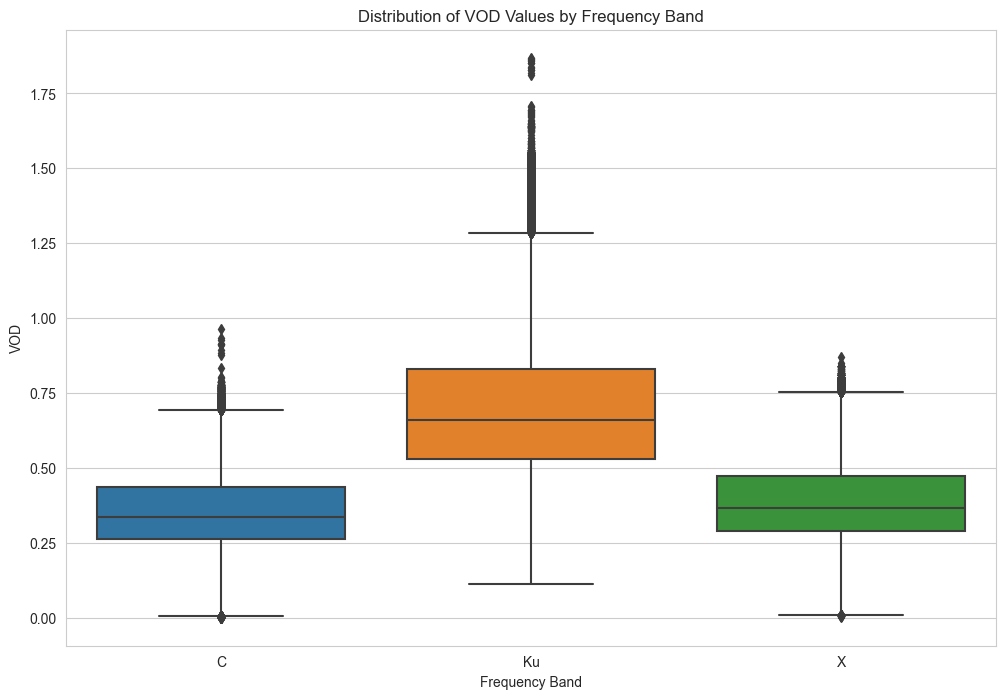

In [54]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Band', y='VOD')
plt.title('Distribution of VOD Values by Frequency Band')
plt.xlabel('Frequency Band')
plt.ylabel('VOD')
plt.show()

# Target Variables EDA

In [55]:
y_columns = ['id', 'image_path']
y_columns += [col for col in train_data.columns if col.endswith('_mean')]

target = train_data[y_columns]
target

id                           image_path   X4_mean   X11_mean  \
0      192027691  ../data/train_images/192027691.jpeg  0.401753  11.758108   
1      195542235  ../data/train_images/195542235.jpeg  0.480334  15.748846   
2      196639184  ../data/train_images/196639184.jpeg  0.796917   5.291251   
3      195728812  ../data/train_images/195728812.jpeg  0.525236   9.568305   
4      195251545  ../data/train_images/195251545.jpeg  0.411821  14.528877   
...          ...                                  ...       ...        ...   
55484  190558785  ../data/train_images/190558785.jpeg  0.337243  11.572778   
55485  194523231  ../data/train_images/194523231.jpeg  0.424371   6.114448   
55486  195888987  ../data/train_images/195888987.jpeg  0.639659   5.549596   
55487  135487319  ../data/train_images/135487319.jpeg  0.774642   7.024218   
55488  146608105  ../data/train_images/146608105.jpeg  0.551888  13.169623   

       X18_mean    X26_mean  X50_mean   X3112_mean  
0      0.117484    1.243779  1.849375    50.216034  
1      0.389315    0.642940  1.353468   574.098472  
2      8.552908    0.395241  2.343153  1130.096731  
3      1.083629    0.154200  1.155308  1042.686546  
4      0.657585   10.919966  2.246226  2386.467180  
...         ...         ...       ...          ...  
55484  0.233690    1.783193  1.608341   969.547831  
55485  1.017099   12.713048  2.418300  1630.015480  
55486  2.717395   10.206478  2.722599   602.229880  
55487  4.429659    9.372170  3.251739   244.387170  
55488  5.827227  154.773325  1.523978  3740.065672  

[55489 rows x 8 columns]

In [56]:
target.describe()

id       X4_mean      X11_mean      X18_mean      X26_mean  \
count  5.548900e+04  55489.000000  5.548900e+04  5.548900e+04  5.548900e+04   
mean   1.714553e+08      0.522575  1.325267e+02  1.969902e+04  3.459399e+03   
std    4.087868e+07      0.174853  1.278220e+04  2.309747e+06  2.471919e+05   
min    2.637500e+04     -2.431157  6.780000e-05  2.330000e-08  5.500000e-07   
25%    1.658614e+08      0.410995  1.063987e+01  3.102831e-01  5.613414e-01   
50%    1.915103e+08      0.509009  1.511232e+01  7.156651e-01  2.519985e+00   
75%    1.951001e+08      0.622383  1.968160e+01  3.586311e+00  1.491886e+01   
max    1.967668e+08      4.475172  1.504254e+06  2.720494e+08  3.106555e+07   

            X50_mean    X3112_mean  
count   55489.000000  5.548900e+04  
mean       13.528574  3.975552e+05  
std      1356.480785  9.152463e+07  
min         0.000097  7.690000e-08  
25%         1.173489  2.552815e+02  
50%         1.480060  7.244318e+02  
75%         1.926343  2.148630e+03  
max    159759.897700  2.155911e+10

# X4 Stem specific density (SSD) or wood density

In [57]:
len(target[target['X4_mean'] < 0])

155

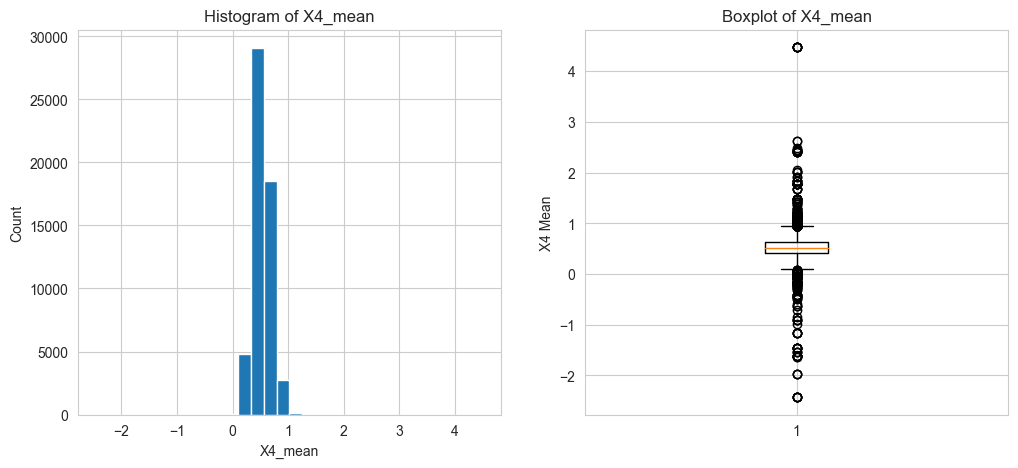

In [58]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target['X4_mean'], bins = 30)
plt.xlabel('X4_mean')
plt.ylabel('Count')
plt.title('Histogram of X4_mean')

plt.subplot(1,2,2)
plt.boxplot(target['X4_mean'])
plt.ylabel('X4 Mean')
plt.title('Boxplot of X4_mean')
plt.show()

# X11 Leaf area per dry mass

## Histogram and Boxplot of X11

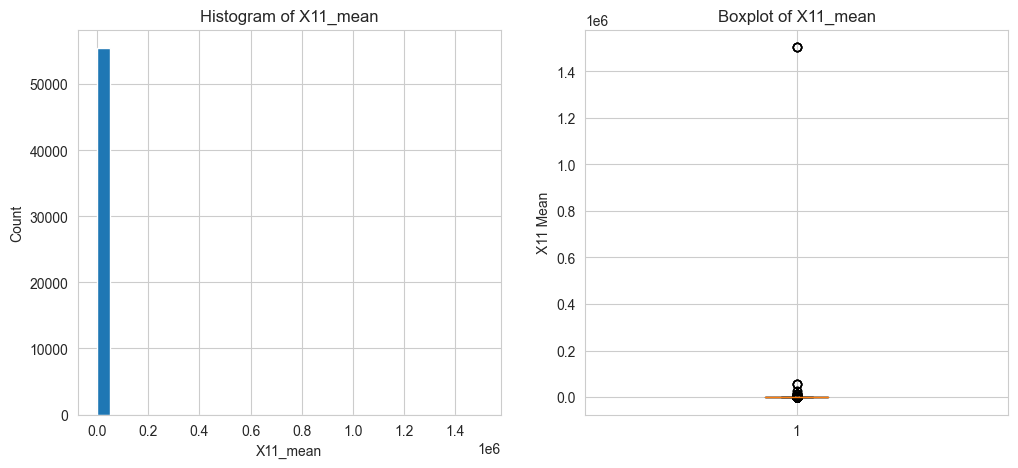

In [59]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target['X11_mean'], bins=30)  
plt.xlabel('X11_mean')  
plt.ylabel('Count')
plt.title('Histogram of X11_mean')  

plt.subplot(1,2,2)
plt.boxplot(target['X11_mean'])  
plt.ylabel('X11 Mean') 
plt.title('Boxplot of X11_mean') 
plt.show()


## Remove Outliers

In [60]:
Q1 = target['X11_mean'].quantile(0.25)
Q3 = target['X11_mean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

target_cleaned = target[(target['X11_mean'] >= lower_bound) & (target['X11_mean'] <= upper_bound)]

## Filtered out Histogram and Boxplot of X11

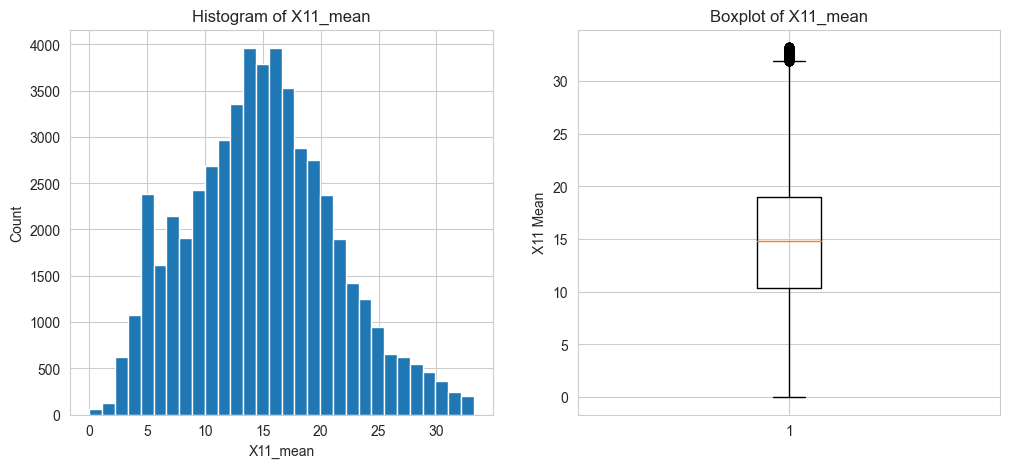

In [61]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target_cleaned['X11_mean'], bins=30)  
plt.xlabel('X11_mean')  
plt.ylabel('Count')
plt.title('Histogram of X11_mean')  

plt.subplot(1,2,2)
plt.boxplot(target_cleaned['X11_mean'])  
plt.ylabel('X11 Mean') 
plt.title('Boxplot of X11_mean') 
plt.show()

# X18 Plant height 

## Histogram and Boxplot of X18 

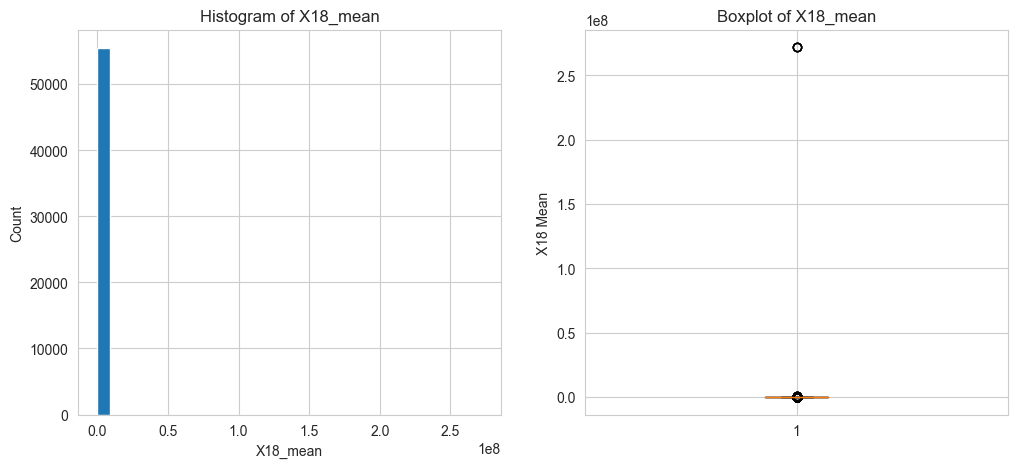

In [62]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target['X18_mean'], bins=30)
plt.xlabel('X18_mean')
plt.ylabel('Count')
plt.title('Histogram of X18_mean')

plt.subplot(1,2,2)
plt.boxplot(target['X18_mean'])
plt.ylabel('X18 Mean')
plt.title('Boxplot of X18_mean')
plt.show()

## Removing outliers

In [63]:
Q1 = target['X18_mean'].quantile(0.25)
Q3 = target['X18_mean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

target_cleaned = target[(target['X18_mean'] >= lower_bound) & (target['X18_mean'] <= upper_bound)]

## Filtered out Histogram and Boxplot of X18

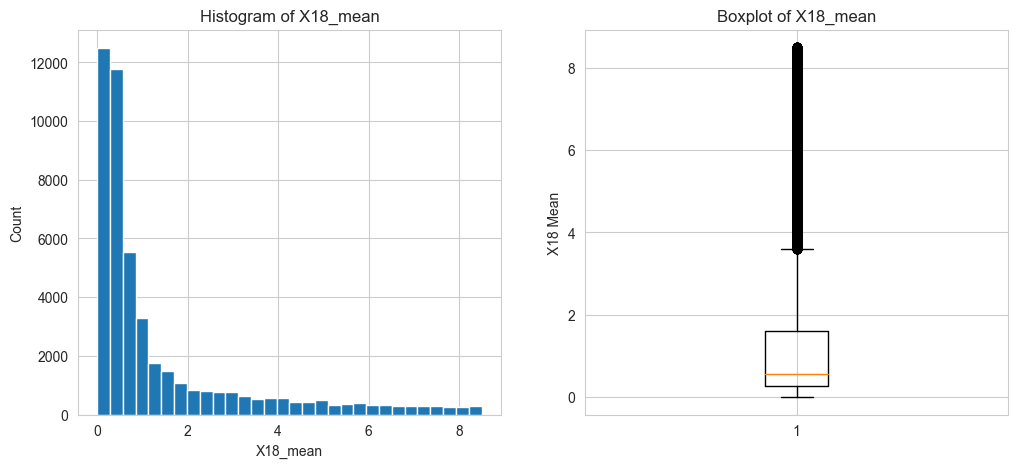

In [64]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target_cleaned['X18_mean'], bins=30)  # Replaced X11_mean with X18_mean
plt.xlabel('X18_mean')  # Replaced X11_mean with X18_mean
plt.ylabel('Count')
plt.title('Histogram of X18_mean')  # Replaced X11_mean with X18_mean

plt.subplot(1,2,2)
plt.boxplot(target_cleaned['X18_mean'])  # Replaced X11_mean with X18_mean
plt.ylabel('X18 Mean')  # Replaced X11_mean with X18_mean
plt.title('Boxplot of X18_mean')  # Replaced X11_mean with X18_mean
plt.show()

# X26 Seed dry mass

## Histogram and Boxplot of X26

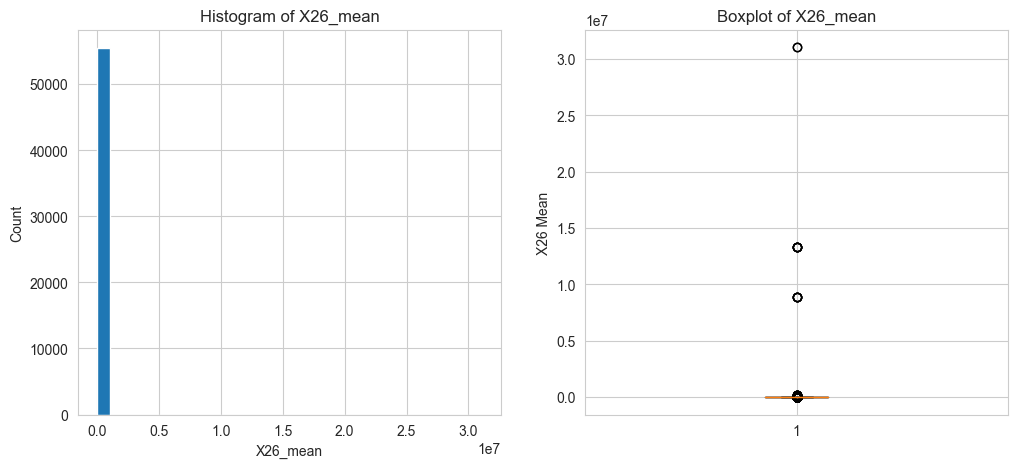

In [65]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target['X26_mean'], bins=30)
plt.xlabel('X26_mean')
plt.ylabel('Count')
plt.title('Histogram of X26_mean')

plt.subplot(1,2,2)
plt.boxplot(target['X26_mean'])
plt.ylabel('X26 Mean')
plt.title('Boxplot of X26_mean')
plt.show()

## Removing Outliers

In [66]:
Q1 = target['X26_mean'].quantile(0.25)
Q3 = target['X26_mean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

target_cleaned = target[(target['X26_mean'] >= lower_bound) & (target['X26_mean'] <= upper_bound)]

## Filtered out Histogram and Boxplot of X26

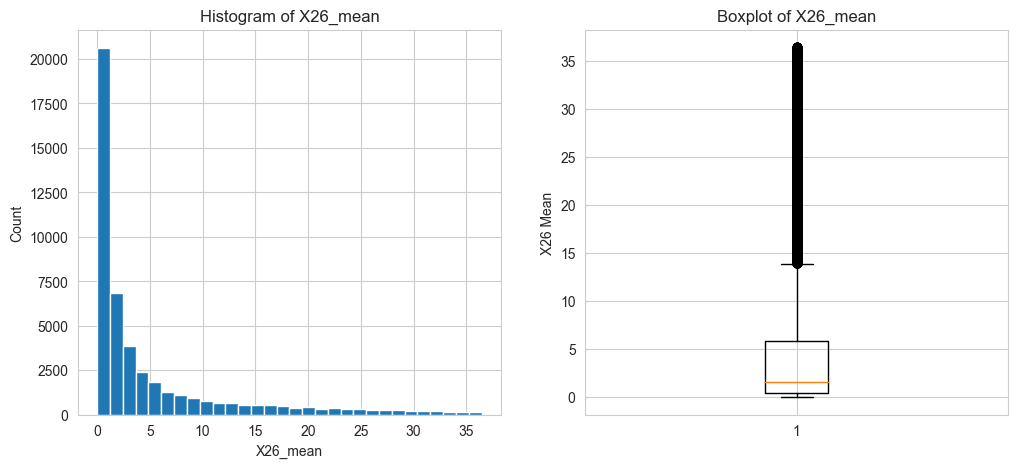

In [67]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target_cleaned['X26_mean'], bins=30)
plt.xlabel('X26_mean')
plt.ylabel('Count')
plt.title('Histogram of X26_mean')

plt.subplot(1,2,2)
plt.boxplot(target_cleaned['X26_mean'])
plt.ylabel('X26 Mean')
plt.title('Boxplot of X26_mean')
plt.show()

# X50 Leaf nitrogen (N) content per leaf area

## Histogram and Boxplot of X50

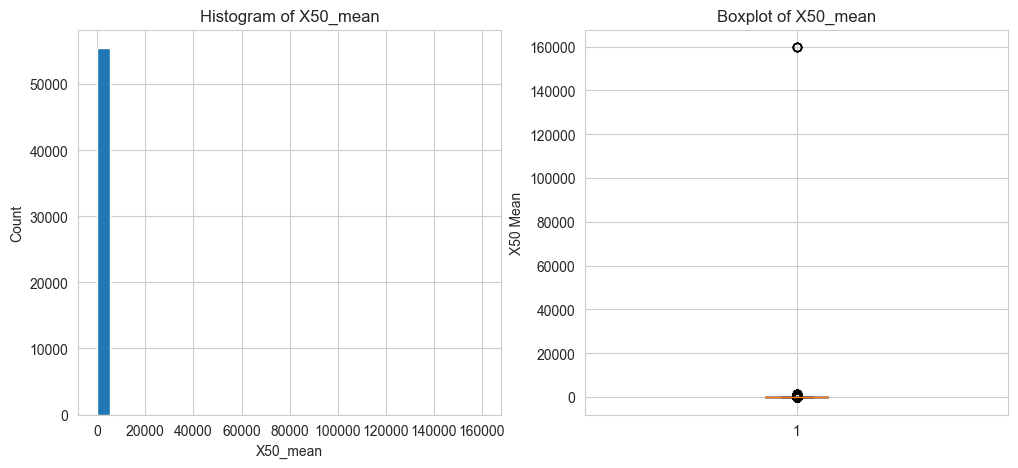

In [68]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target['X50_mean'], bins=30)
plt.xlabel('X50_mean')
plt.ylabel('Count')
plt.title('Histogram of X50_mean')

plt.subplot(1,2,2)
plt.boxplot(target['X50_mean'])
plt.ylabel('X50 Mean')
plt.title('Boxplot of X50_mean')
plt.show()

## Removing Outliers

In [69]:
Q1 = target['X50_mean'].quantile(0.25)
Q3 = target['X50_mean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

target_cleaned = target[(target['X50_mean'] >= lower_bound) & (target['X50_mean'] <= upper_bound)]

## Filtered out Histogram and Boxplot of X50

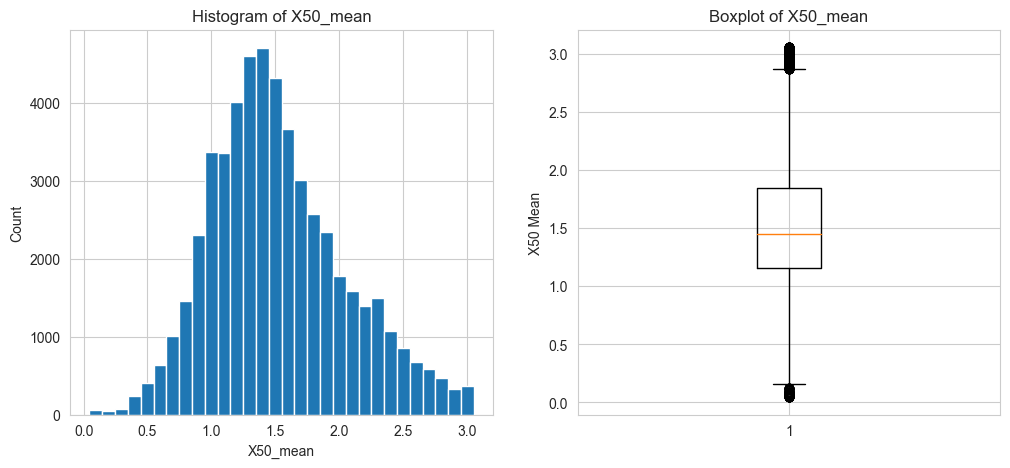

In [70]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target_cleaned['X50_mean'], bins=30)
plt.xlabel('X50_mean')
plt.ylabel('Count')
plt.title('Histogram of X50_mean')

plt.subplot(1,2,2)
plt.boxplot(target_cleaned['X50_mean'])
plt.ylabel('X50 Mean')
plt.title('Boxplot of X50_mean')
plt.show()

# X3112 Leaf area

## Histogram and Boxplot of X3112

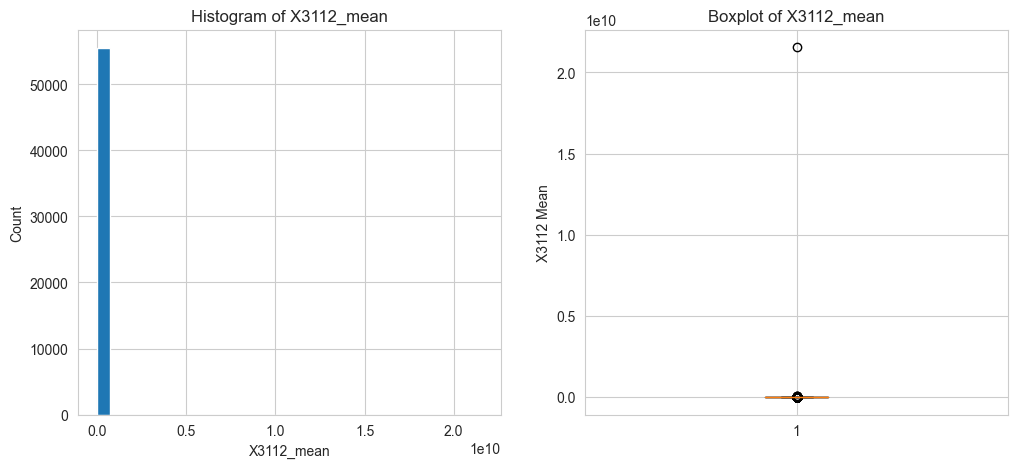

In [71]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target['X3112_mean'], bins=30)
plt.xlabel('X3112_mean')
plt.ylabel('Count')
plt.title('Histogram of X3112_mean')

plt.subplot(1,2,2)
plt.boxplot(target['X3112_mean'])
plt.ylabel('X3112 Mean')
plt.title('Boxplot of X3112_mean')
plt.show()

## Removing Outliers

In [72]:
Q1 = target['X3112_mean'].quantile(0.25)
Q3 = target['X3112_mean'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

target_cleaned = target[(target['X3112_mean'] >= lower_bound) & (target['X3112_mean'] <= upper_bound)]

## Filtered out Histogram and Boxplot of X3112

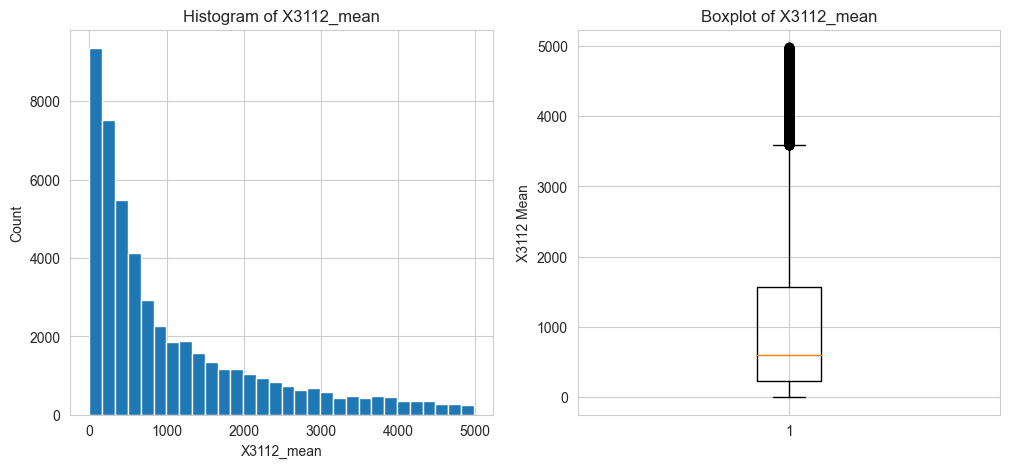

In [73]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(target_cleaned['X3112_mean'], bins=30)
plt.xlabel('X3112_mean')
plt.ylabel('Count')
plt.title('Histogram of X3112_mean')

plt.subplot(1,2,2)
plt.boxplot(target_cleaned['X3112_mean'])
plt.ylabel('X3112 Mean')
plt.title('Boxplot of X3112_mean')
plt.show()

Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

In [ ]:
### YOUR CODE HERE

# 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

`### Comment here`

Image size is 512 x 512.  

Input variables can be categorized into 4 types- World Climate, Soil, MODIS(Satellite data that measures optical reflectance of sun light), VOD (Data from a radar constellation that is sensitive to water content and biomass of plants)

## World Climate:
1. Distribution of Annual Mean temperature is left skewed
2. Distribution of Temperature Seasonality is right skewed
3. Distribution of Temperature Range is right skewed
4. Annual Mean temperature and Temperature Seasonality have negative correlation
5. Annual Mean temperature and Temperature Range have negative correlation
6. Distribution of Annual Precipitation is heavily right skewed
7. Distribution of Precipitation seasonality is slightly right skewed
8. Distibution of Delta Precipitation is very heavily right skewed
9. Annual Precipation and Precipitation seasonality does not have much correlation

## SOIL: 

Soil has further subcategories, which show the following behaviour: 

1. Bulk Density (BDOD): Increases as the soil depth increases.
2. Cation exchange capacity: Decreases with increase in soil depth
3. Soil pH: Increases with increase in soil depth
4. Organic Carbon Distribution: Decreases with increase in soil depth
5. Texture (in grams per kg): Highest proportion of sand if found in most cases, followed by silt and clay.
6. Proportion of Sand Particles decreases generally, as the depth increases. Likewise with silt, however in case of clay the behviour is the opposite.

## MODIS 
1. The reflectance values start decreasing from February to October and then increase from October to February
2. The reflectance values are at their peak in February
3. Bands 2 and 5 have the highest reflectance values. Band 3 has the lowest reflectance values

## VOD 
1. Frequency Band 'Ku' has the highest VOD values followed by 'X' and 'C'
2. The VOD values start increasing from Feb to July and then start decreasing from July to Dec.

## Target Variables
1. Stem specific density is right skewed. (X4)
2. The median value is about 0.5
3. Leaf area per dry mass is relatively balanced. (X11)
4. The median value is about 15
5. Plant height is heavily right skewed. (X18)
6. The median value is about 7.15
7. Seed dry mass is heavily right skewed. (X26)
8. The median value is about 2.5
9. Leaf nitrogen content per leaf area is relatively balanced. (X50)
10. The median value is about 1.48
11. Leaf area is right skewed. (X3112)
12. The median value is about 724.3